In [266]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms 

from functions import *


from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))
transform = transforms.Resize((29, 10))
original = torch.load('data/dataset_normalized_consistent_only.pt')

# Original

In [599]:
full_evaluation(original, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 100.00%



			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-------------------------------------------------------------------------------------------------------
Monotonicity threshold = -1e-06% change
Perc of occurences where mass is not preserved = 25.45%


Monotonicity threshold = -0.1% change
Perc of occurences where mass is not preserved = 0.28%
-------------------------------------------------------------------------------------------------------
DISTANCE:
-------------------------------------------------------------------------------------------------------
Percentage of occurences where distance increase (not preserved) = 49.56%


Percentage of last halo distance is not the lowest in the branch = 17.33% 


jumps greater than 20.0% (negative or positive) = 4.49% of a

In [267]:
total = check_branch_length(original, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        check_branch_length(lis)
        

number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 6075
number of images with 6 branches is: 0
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 0

average number of branches in the image = 5.00
Average branch length = 10.07
Number of nonzero entries (progenitors) = 50.36



number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 6139
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 0

average number of branches in the image = 6.00
Average branch length = 9.48
Number

# T = 100

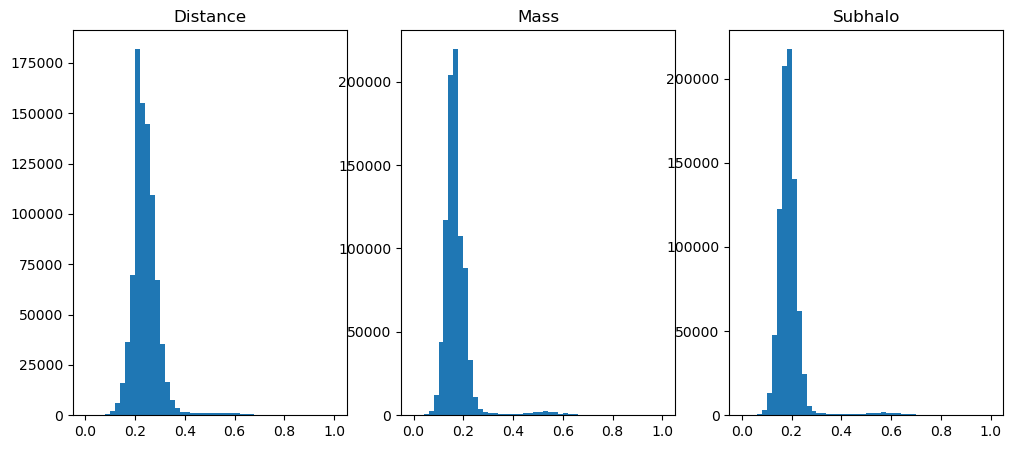

In [390]:

T100 = torch.load("../testing/good_model/generated_image_epochs=200_BILINEAR_T=100_linear.pt", map_location = "cpu")
T100 = transform(T100.to(dtype=torch.float))
T100 = normalize(T100, True, [0, 1, 2])


dist = T100[:, 0]
mass = T100[:, 1]
subh = T100[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [391]:
# dist
print("dist:")
lower_threshold = 0.15
upper_threshold = 0.25
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.56
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.2
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.6
upper_threshold = 0.7
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.15 and 0.25: 60.79%

mass:
Percentage of values between 0.2 and 0.56: 13.50%

subh:
Percentage of values between 0.2 and 0.4: 27.51%

Percentage of values between 0.6 and 0.7: 0.61%



In [392]:
T100 = transform_diffusion_image(T100, d_thresh = 0.4, m_tresh = 0.4, s_low = 0.4, s_high = 0.75)

full_evaluation(T100, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 1.00%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 77.17%
inconsistency due to distance not zero in main branch =  0.61%
inconsistency due to gap between branches =  71.08%
inconsistency due to zgap in branch 15.22%
inconsistency due to last descendant dont exist 86.23%

Number of images with two or more inconsistencies = 2609, which is  87.85%
That corresponds to 86.97% of all images


Of all images, 76.40% have zero inconsistency
Of all images, 0.60% have distance main branch inconsistency
Of all images, 70.37% have gap between branches inconsistency
Of all images, 15.07% have gap within branch inconsistency
Of all images, 85.37% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------

# T = 250

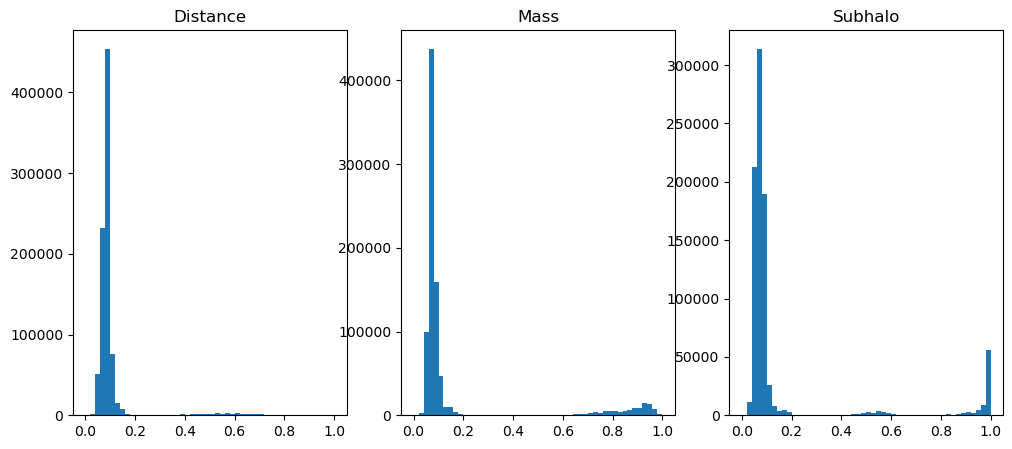

In [372]:

T250 = torch.load("../testing/good_model/generated_image_epochs=200_BILINEAR_T=250_linear.pt", map_location = "cpu")
T250 = transform(T250.to(dtype=torch.float))
T250 = normalize(T250, True, [0, 1, 2])


dist = T250[:, 0]
mass = T250[:, 1]
subh = T250[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [383]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.23
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.49
upper_threshold = 0.56
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.3
upper_threshold = 0.38
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

lower_threshold = 0.73
upper_threshold = 0.75
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.23: 0.00%

mass:
Percentage of values between 0.49 and 0.56: 0.00%

subh:
Percentage of values between 0.3 and 0.38: 0.00%

Percentage of values between 0.73 and 0.75: 0.00%



In [384]:
T250 = transform_diffusion_image(T250, d_thresh = 0.23, m_tresh = 0.55, s_low = 0.35, s_high = 0.74)

full_evaluation(T250, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 89.37%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 20.38%
inconsistency due to distance not zero in main branch =  0.31%
inconsistency due to gap between branches =  52.04%
inconsistency due to zgap in branch 48.28%
inconsistency due to last descendant dont exist 2.19%

Number of images with two or more inconsistencies = 64, which is  20.06%
That corresponds to 2.13% of all images


Of all images, 2.17% have zero inconsistency
Of all images, 0.03% have distance main branch inconsistency
Of all images, 5.53% have gap between branches inconsistency
Of all images, 5.13% have gap within branch inconsistency
Of all images, 0.23% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-----------------------------------------

In [385]:
total = check_branch_length(T250, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        check_branch_length(con)
        



Percentage of consistant images = 100.00%


number of images with 1 branches is: 27
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 0

average number of branches in the image = 1.00
Average branch length = 14.41
Number of nonzero entries (progenitors) = 14.41





Percentage of consistant images = 81.08%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  42.86%
inconsistency due to zgap in branch 57.14%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 0, which is  0.00%
That corresponds to 0.00% of



Percentage of consistant images = 71.43%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 22.73%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  50.00%
inconsistency due to zgap in branch 54.55%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 5, which is  22.73%
That corresponds to 6.49% of all images


Of all images, 6.49% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 14.29% have gap between branches inconsistency
Of all images, 15.58% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches i

# T = 500

/Users/corneliusbencsik/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


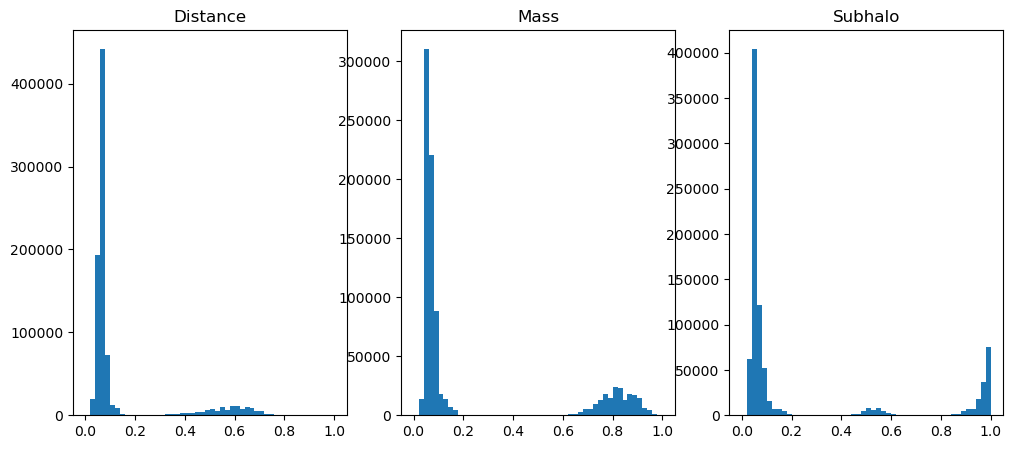

In [2]:

T500 = torch.load("../testing/good_model/generated_image_epochs=200_BILINEAR_T=500_linear.pt", map_location = "cpu")
T500 = transform(T500.to(dtype=torch.float))
T500 = normalize(T500, True, [0, 1, 2])


dist = T500[:, 0]
mass = T500[:, 1]
subh = T500[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [44]:
# dist
print("dist:")
lower_threshold = 0.22
upper_threshold = 0.28
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.21
upper_threshold = 0.57
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.23
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.7
upper_threshold = 0.75
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.22 and 0.28: 0.08%

mass:
Percentage of values between 0.21 and 0.57: 0.00%

subh:
Percentage of values between 0.23 and 0.4: 0.00%

Percentage of values between 0.7 and 0.75: 0.00%



In [45]:
T500 = transform_diffusion_image(T500, d_thresh = 0.25, m_tresh = 0.57, s_low = 0.35, s_high = 0.74)

full_evaluation(T500, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 87.30%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 92.13%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  48.82%
inconsistency due to zgap in branch 3.15%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 167, which is  43.83%
That corresponds to 5.57% of all images


Of all images, 11.70% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 6.20% have gap between branches inconsistency
Of all images, 0.40% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------------

In [238]:
total = check_branch_length(T500, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        check_branch_length(con)
        

number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 4
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 0

average number of branches in the image = 4.00
Average branch length = 12.00
Number of nonzero entries (progenitors) = 48.00



number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 641
number of images with 6 branches is: 0
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 0

average number of branches in the image = 5.00
Average branch length = 10.52
Number of

# T = 750

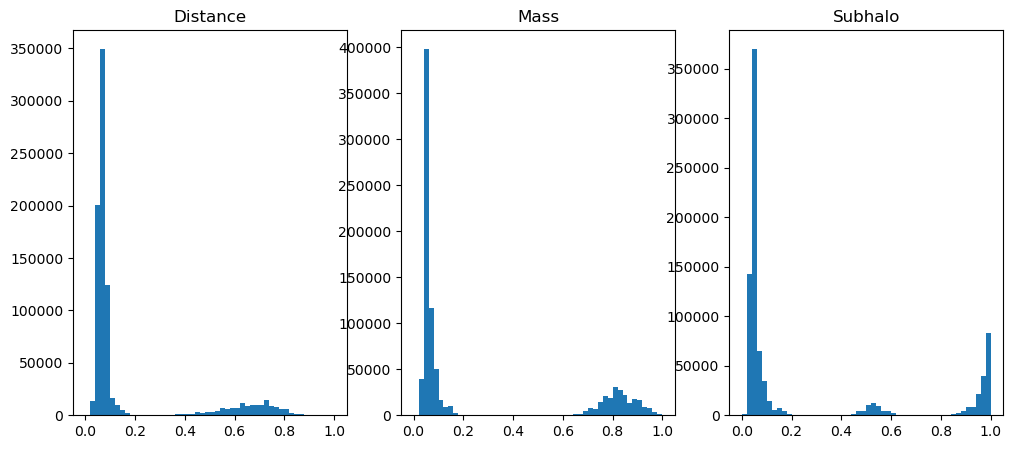

In [46]:

T750 = torch.load("../testing/good_model/generated_image_epochs=200_BILINEAR_T=750_linear.pt", map_location = "cpu")
T750 = transform(T750.to(dtype=torch.float))
T750 = normalize(T750, True, [0, 1, 2])


dist = T750[:, 0]
mass = T750[:, 1]
subh = T750[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [82]:
# dist
print("dist:")
lower_threshold = 0.19
upper_threshold = 0.24
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.57
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.24
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.71
upper_threshold = 0.76
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.19 and 0.24: 0.01%

mass:
Percentage of values between 0.2 and 0.57: 0.00%

subh:
Percentage of values between 0.24 and 0.4: 0.00%

Percentage of values between 0.71 and 0.76: 0.00%



In [83]:
T750 = transform_diffusion_image(T750, d_thresh = 0.24, m_tresh = 0.55, s_low = 0.35, s_high = 0.75)

full_evaluation(T750, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 95.40%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 45.65%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  39.86%
inconsistency due to zgap in branch 32.61%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 25, which is  18.12%
That corresponds to 0.83% of all images


Of all images, 2.10% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 1.83% have gap between branches inconsistency
Of all images, 1.50% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-----------------------------------------

In [272]:
total = check_branch_length(T750, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        check_branch_length(con)
        



Percentage of consistant images = 100.00%


number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 1
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 0

average number of branches in the image = 4.00
Average branch length = 12.75
Number of nonzero entries (progenitors) = 51.00





Percentage of consistant images = 97.29%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 50.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  8.33%
inconsistency due to zgap in branch 50.00%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 1, which is  8.33%
That corresponds to 0.23% of 

In [601]:
64.06  / 83.09 

1.1266268026732325

# T = 900

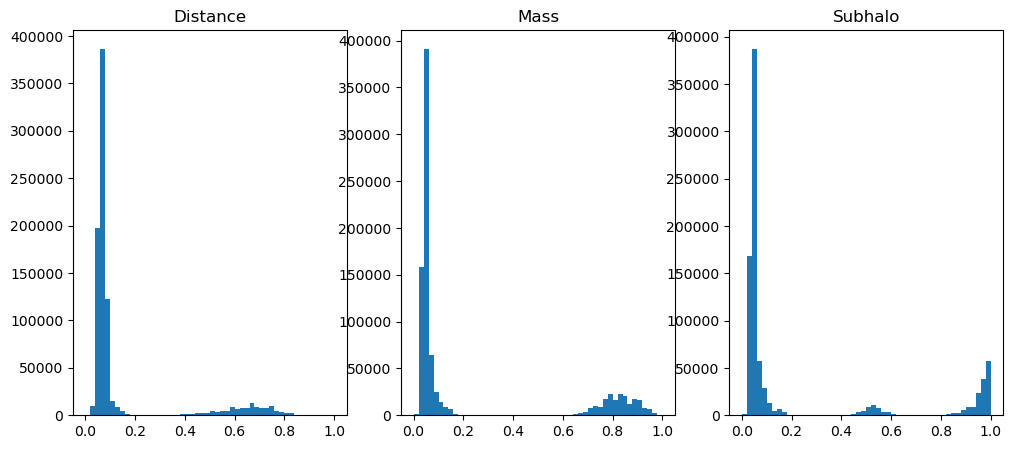

In [586]:

T900 = torch.load("../testing/good_model/generated_image_epochs=200_BILINEAR_T=900_linear.pt", map_location = "cpu")
T900 = transform(T900.to(dtype=torch.float))
T900 = normalize(T900, True, [0, 1, 2])


dist = T900[:, 0]
mass = T900[:, 1]
subh = T900[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [587]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.24
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.21
upper_threshold = 0.57
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.22
upper_threshold = 0.38
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.7
upper_threshold = 0.74
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.24: 0.00%

mass:
Percentage of values between 0.21 and 0.57: 0.00%

subh:
Percentage of values between 0.22 and 0.38: 0.00%

Percentage of values between 0.7 and 0.74: 0.00%



In [588]:
T900 = transform_diffusion_image(T900, d_thresh = 0.24, m_tresh = 0.55, s_low = 0.38, s_high = 0.74)

full_evaluation(T900, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 97.07%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 26.14%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  42.05%
inconsistency due to zgap in branch 46.59%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 13, which is  14.77%
That corresponds to 0.43% of all images


Of all images, 0.77% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 1.23% have gap between branches inconsistency
Of all images, 1.37% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-----------------------------------------

In [236]:
total = check_branch_length(T900, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        check_branch_length(con)
        

number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 2
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 0

average number of branches in the image = 4.00
Average branch length = 12.62
Number of nonzero entries (progenitors) = 50.50



number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 430
number of images with 6 branches is: 0
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 0
number of images with 10 branches is: 0

average number of branches in the image = 5.00
Average branch length = 10.29
Number of

In [571]:
con900, incon900 = check_consistency(T900)

Consistency:


Percentage of consistant images = 97.07% vs. 97.51% in training data

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 26.14%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  42.05%
inconsistency due to zgap in branch 46.59%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 13, which is  14.77%
That corresponds to 0.43% of all images


Of all images, 0.77% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 1.23% have gap between branches inconsistency
Of all images, 1.37% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency





In [572]:
#torch.save(con900, "data/generated_best_diffusion_consistent.pt")

Real images:


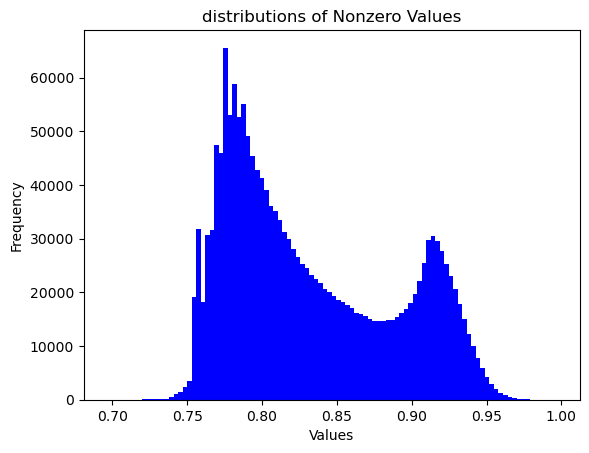

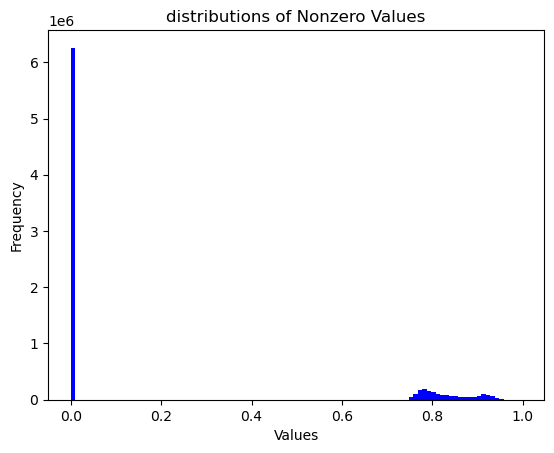

number of nonzero values = 1745097
Generated images:


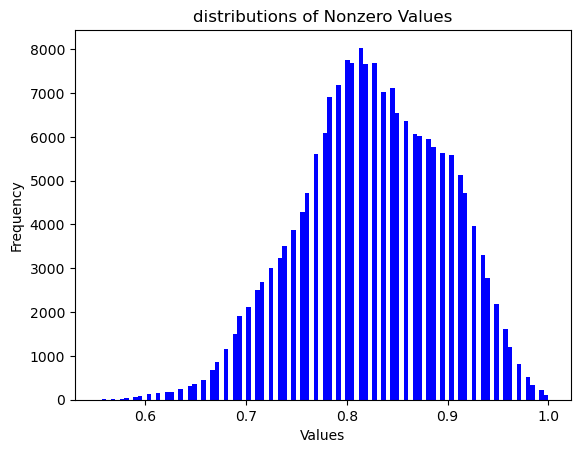

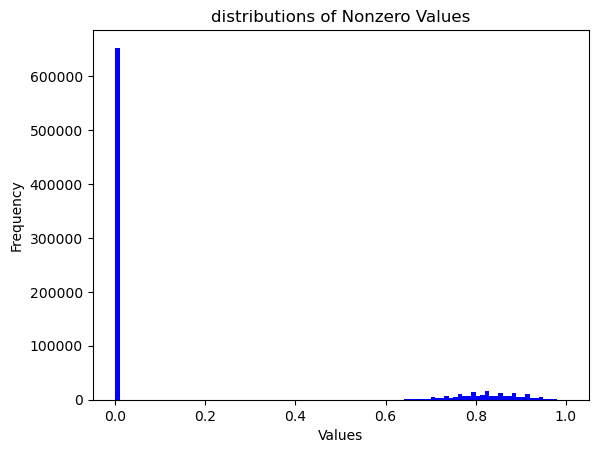

number of nonzero values = 191952


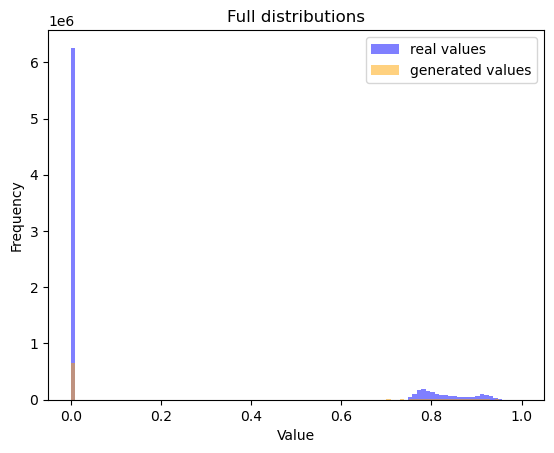

Full distribution:
KS Statistic: 0.029227426852446614
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0016:
The distributions are significantly different (reject H0), KS statistic 0.0292 > 0.0016


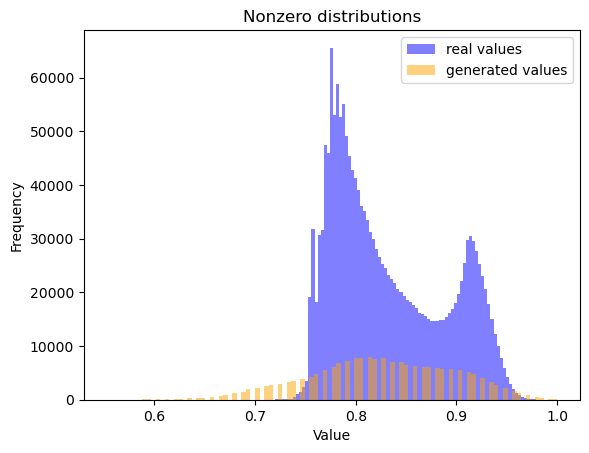

Nonzero distribution:
KS Statistic: 0.1691732939301107
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0033:
The distributions are significantly different (reject H0), KS statistic 0.1692 > 0.0033


(0.029227426852446614, 0.1691732939301107)

In [574]:
from useful_functions_notebook_8to13 import *
ks_test(original, con900, dim = 1)

In [575]:
from scipy.stats import ks_2samp
ks_2samp(original[:, 1].flatten(), con900[:, 1].flatten())

KstestResult(statistic=0.029227426852446614, pvalue=0.0, statistic_location=0.753731369972229, statistic_sign=-1)

In [579]:
origin = original[:, 1]
indices = torch.nonzero(origin.flatten())
origin = origin.flatten()[indices[:, 0]]
origin.min(), origin.max()

(tensor(0.6958, dtype=torch.float64), tensor(0.9971, dtype=torch.float64))

In [577]:
mass = con900[:, 1]
indices = torch.nonzero(mass.flatten())
mass = mass.flatten()[indices[:, 0]]
mass.min(), mass.max()

(tensor(0.5522), tensor(1.))

In [585]:
# Assuming you have a tensor named 'tensor' and a threshold value
threshold = 0.6958  # Define the threshold value
t2 = 0.9971

# Count the number of values less than the threshold
count_below_threshold = torch.sum(mass < threshold).item()
count_above_threshold = torch.sum(mass > t2).item()

# Calculate the total number of elements in the tensor
total_elements = mass.numel()

# Calculate the percentage of values less than the threshold
percentage_below_threshold = ((count_below_threshold +  count_above_threshold)/ total_elements) * 100

# Print the result
print(f"Percentage of values less than {threshold}: {percentage_below_threshold:.2f}%")


Percentage of values less than 0.6958: 4.42%


# T = 950

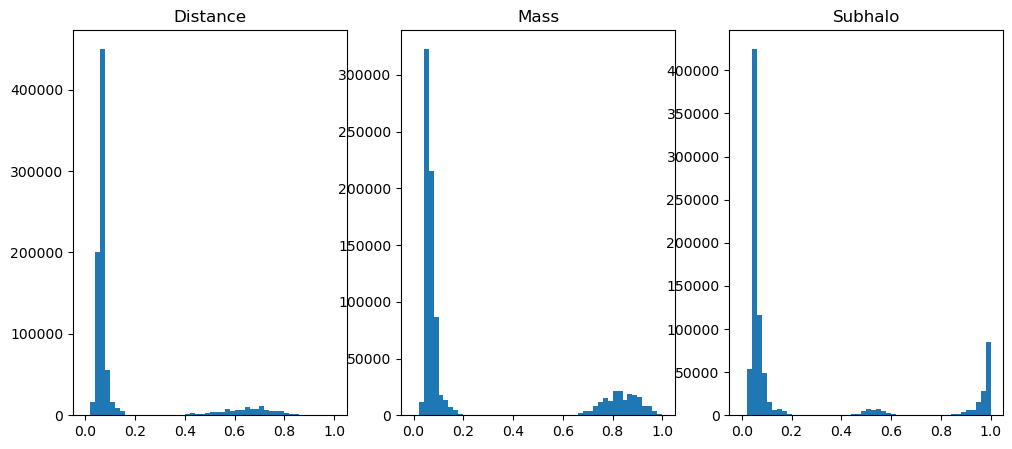

In [589]:

T950 = torch.load("../testing/good_model/generated_image_epochs=200_BILINEAR_T=950_linear.pt", map_location = "cpu")
T950 = transform(T950.to(dtype=torch.float))
T950 = normalize(T950, True, [0, 1, 2])


dist = T950[:, 0]
mass = T950[:, 1]
subh = T950[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [590]:
# dist
print("dist:")
lower_threshold = 0.22
upper_threshold = 0.25
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.21
upper_threshold = 0.57
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.23
upper_threshold = 0.39
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.69
upper_threshold = 0.74
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.22 and 0.25: 0.00%

mass:
Percentage of values between 0.21 and 0.57: 0.00%

subh:
Percentage of values between 0.23 and 0.39: 0.00%

Percentage of values between 0.69 and 0.74: 0.00%



In [591]:
T950 = transform_diffusion_image(T950, d_thresh = 0.24, m_tresh = 0.55, s_low = 0.38, s_high = 0.74)

full_evaluation(T950, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 97.27%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 53.66%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  54.88%
inconsistency due to zgap in branch 25.61%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 28, which is  34.15%
That corresponds to 0.93% of all images


Of all images, 1.47% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 1.50% have gap between branches inconsistency
Of all images, 0.70% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-----------------------------------------

In [270]:
total = check_branch_length(T950, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        check_branch_length(con)
        



Percentage of consistant images = 50.00%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  100.00%
inconsistency due to zgap in branch 0.00%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 0, which is  0.00%
That corresponds to 0.00% of all images


Of all images, 0.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 50.00% have gap between branches inconsistency
Of all images, 0.00% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 2
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is: 

# T = 1000

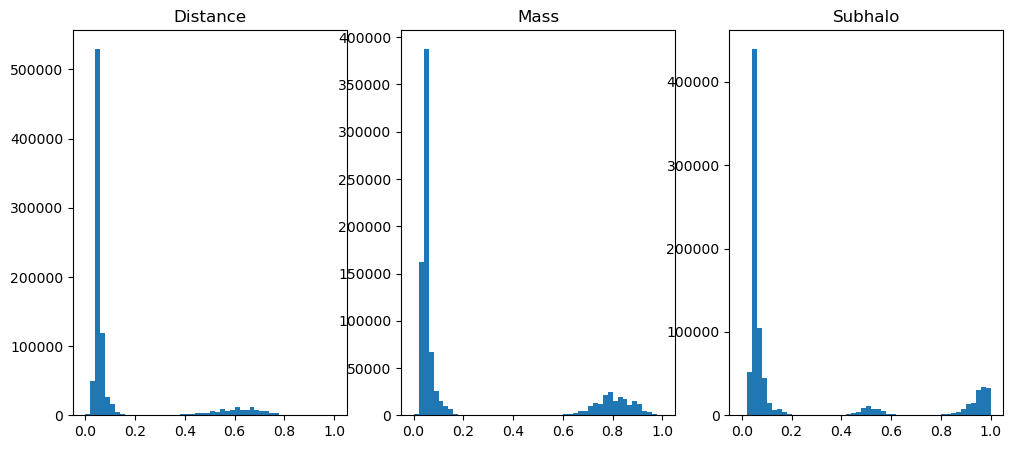

In [592]:

T1000 = torch.load("../testing/good_model/generated_image_epochs=200_BILINEAR_T=1000_linear.pt", map_location = "cpu")
T1000 = transform(T1000.to(dtype=torch.float))
T1000 = normalize(T1000, True, [0, 1, 2])


dist = T1000[:, 0]
mass = T1000[:, 1]
subh = T1000[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [593]:
# dist
print("dist:")
lower_threshold = 0.21
upper_threshold = 0.26
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.19
upper_threshold = 0.53
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.23
upper_threshold = 0.29
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.69
upper_threshold = 0.72
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.21 and 0.26: 0.01%

mass:
Percentage of values between 0.19 and 0.53: 0.00%

subh:
Percentage of values between 0.23 and 0.29: 0.00%

Percentage of values between 0.69 and 0.72: 0.00%



In [594]:
T1000 = transform_diffusion_image(T1000, d_thresh = 0.25, m_tresh = 0.53, s_low = 0.29, s_high = 0.72)

full_evaluation(T1000, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 95.20%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 70.14%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  44.44%
inconsistency due to zgap in branch 22.92%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 54, which is  37.50%
That corresponds to 1.80% of all images


Of all images, 3.37% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 2.13% have gap between branches inconsistency
Of all images, 1.10% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-----------------------------------------

In [491]:
total = check_branch_length(T1000, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        check_branch_length(con)
        



Percentage of consistant images = 66.67%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 100.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  100.00%
inconsistency due to zgap in branch 0.00%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 1, which is  100.00%
That corresponds to 33.33% of all images


Of all images, 33.33% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 33.33% have gap between branches inconsistency
Of all images, 0.00% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 2
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branche

In [ ]:
[9.53, 9.05, 8.62, 8.32, 8.15, 8.21]

# T = 1250

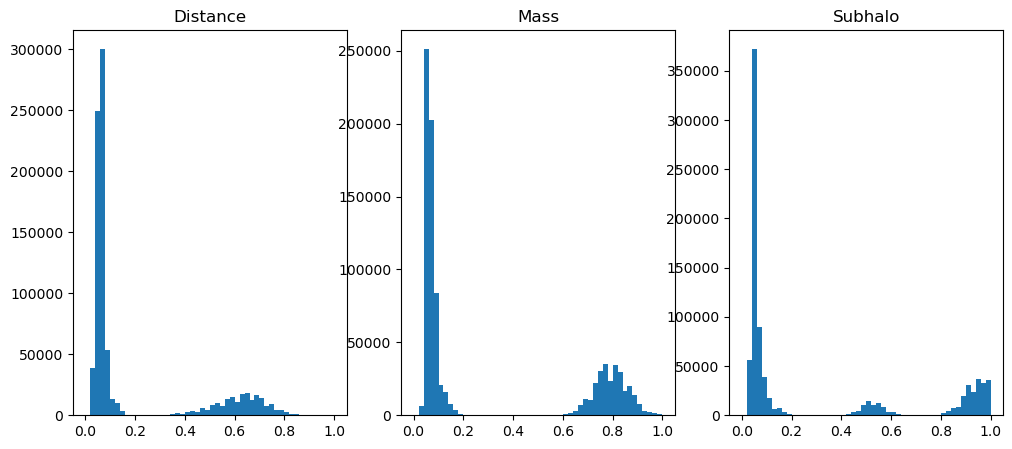

In [397]:

T1250 = torch.load("../testing/good_model/generated_image_epochs=200_BILINEAR_T=1250_linear.pt", map_location = "cpu")
T1250 = transform(T1250.to(dtype=torch.float))
T1250 = normalize(T1250, True, [0, 1, 2])


dist = T1250[:, 0]
mass = T1250[:, 1]
subh = T1250[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [430]:
# dist
print("dist:")
lower_threshold = 0.19
upper_threshold = 0.3
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.21
upper_threshold = 0.55
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.23
upper_threshold = 0.39
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.7
upper_threshold = 0.75
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.19 and 0.3: 0.06%

mass:
Percentage of values between 0.21 and 0.55: 0.00%

subh:
Percentage of values between 0.23 and 0.39: 0.00%

Percentage of values between 0.7 and 0.75: 0.03%



In [431]:
T1250 = transform_diffusion_image(T1250, d_thresh = 0.25, m_tresh = 0.55, s_low = 0.35, s_high = 0.72)

full_evaluation(T1250, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 93.90%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 46.99%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  34.43%
inconsistency due to zgap in branch 40.98%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 39, which is  21.31%
That corresponds to 1.30% of all images


Of all images, 2.87% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 2.10% have gap between branches inconsistency
Of all images, 2.50% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
-----------------------------------------

In [436]:
total = check_branch_length(T1250, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        if len(con) > 0:
            check_branch_length(con)
        



Percentage of consistant images = 0.0%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 100.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  100.00%
inconsistency due to zgap in branch 0.00%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 1, which is  100.00%
That corresponds to 100.00% of all images


Of all images, 100.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 100.00% have gap between branches inconsistency
Of all images, 0.00% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


Percentage of consistant images = 50.00%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 100.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  50.00%
inconsistency due to zgap in



Percentage of consistant images = 92.17%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 45.31%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  12.50%
inconsistency due to zgap in branch 60.94%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 11, which is  17.19%
That corresponds to 1.35% of all images


Of all images, 3.55% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 0.98% have gap between branches inconsistency
Of all images, 4.77% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is

# T = 1500

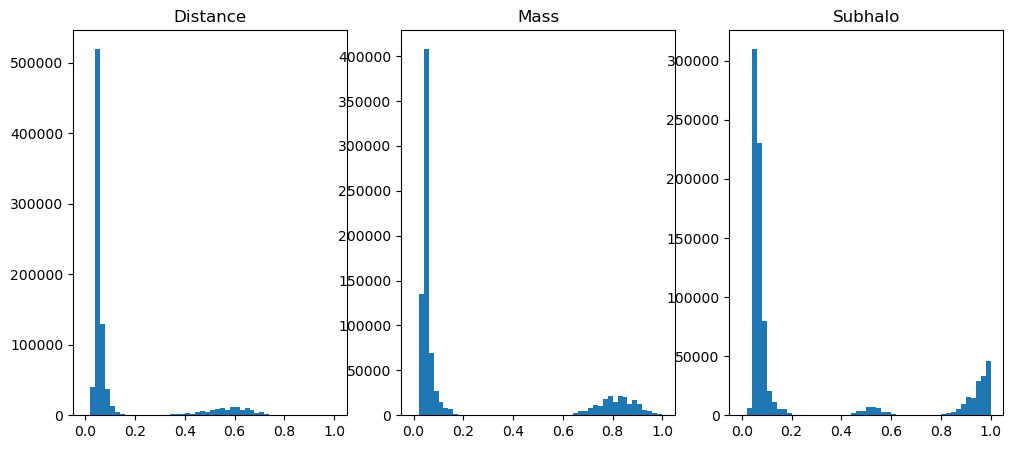

In [437]:

T1500 = torch.load("../testing/good_model/generated_image_epochs=200_BILINEAR_T=1500_linear.pt", map_location = "cpu")
T1500 = transform(T1500.to(dtype=torch.float))
T1500 = normalize(T1500, True, [0, 1, 2])


dist = T1500[:, 0]
mass = T1500[:, 1]
subh = T1500[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [469]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.27
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.21
upper_threshold = 0.55
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.25
upper_threshold = 0.38
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.7
upper_threshold = 0.72
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.27: 0.06%

mass:
Percentage of values between 0.21 and 0.55: 0.00%

subh:
Percentage of values between 0.25 and 0.38: 0.00%

Percentage of values between 0.7 and 0.72: 0.00%



In [470]:
T1500 = transform_diffusion_image(T1500, d_thresh = 0.25, m_tresh = 0.55, s_low = 0.35, s_high = 0.72)

full_evaluation(T1500, original)

Analyzing generated merger tree dataset ...

			 CONSISTENCY CHECK


Percentage of consistant images = 88.40%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 80.75%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  30.75%
inconsistency due to zgap in branch 19.54%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 108, which is  31.03%
That corresponds to 3.60% of all images


Of all images, 9.37% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 3.57% have gap between branches inconsistency
Of all images, 2.27% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency

			 VARIABLE CONSISTENY CHECK of consistent trees
-------------------------------------------------------------------------------------------------------
MASS:
----------------------------------------

In [541]:
total = check_branch_length(T1500, printer = False) 
for i, branch_num in enumerate(total):
    if len(branch_num) > 0:
        lis = torch.stack(branch_num)
        con, incon = check_consistency(lis)
        if len(con) > 0:
            check_branch_length(con)
        



Percentage of consistant images = 16.67%



Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 80.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  60.00%
inconsistency due to zgap in branch 0.00%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 2, which is  40.00%
That corresponds to 33.33% of all images


Of all images, 66.67% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 50.00% have gap between branches inconsistency
Of all images, 0.00% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 1
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches i

# Result and sampling speed

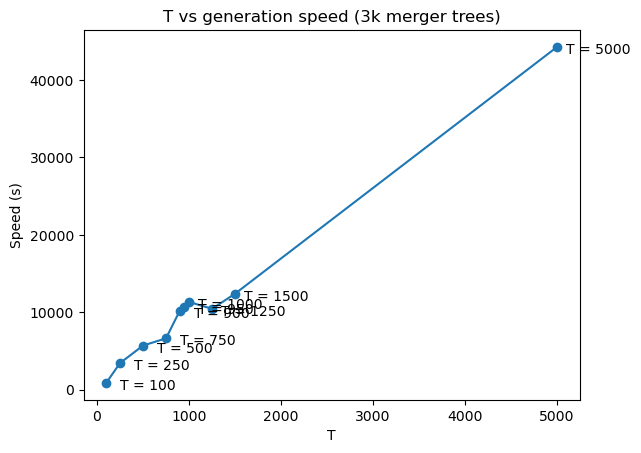

In [595]:
Ts = [100, 250, 500, 750, 900, 950, 1000, 1250, 1500]
speed = [881.1, 3436.9, 5702.5, 6636.6, 10205.9, 10737.3, 11339.4, 10444.1, 12394.86]

# Plot
plt.plot(Ts, speed, marker='o', linestyle='-')

for i, txt in enumerate(Ts):
    plt.annotate(f"T = {txt}", (Ts[i], speed[i]), textcoords="offset points", xytext=(30,-5), ha='center')


# Labels and title
plt.xlabel('T')
plt.ylabel('Speed (s)')
plt.title('T vs generation speed (3k merger trees)')
plt.savefig("time_T")

# Show plot
plt.show()

In [602]:
74.78 / 63.23

1.1826664557962994

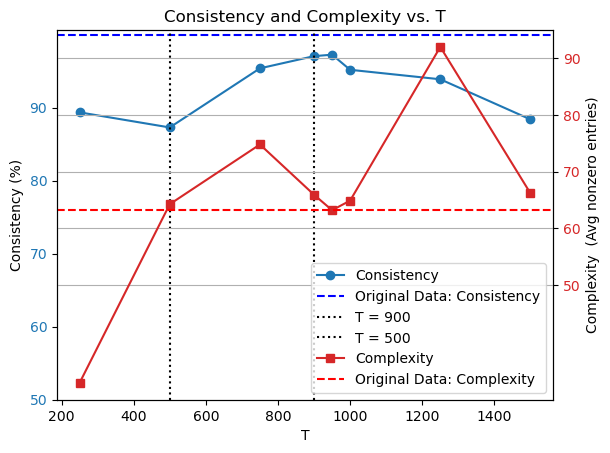

In [559]:
Ts = [250, 500, 750, 900, 950, 1000, 1250, 1500]
consistency = [89.37, 87.30, 95.40, 97.07, 97.27, 95.20, 93.90, 88.40]
complexity = [32.77, 64.26, 74.78, 65.92, 63.20, 64.89, 91.97, 66.17]
avg_branch_length = [5.80, 7.10, 7.53, 7.30, 6.93, 7.62, 7.95, 7.14]



# Plot consistency and complexity
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('T')
ax1.set_ylabel('Consistency (%)', color="black")
ax1.plot(Ts, consistency, color=color, marker='o', linestyle='-', label='Consistency')
ax1.axhline(y=100.00, color='blue', linestyle='--', label='Original Data: Consistency')
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_ticks(np.arange(50, 100, 10))
ax1.axvline(x=900, color='black', linestyle=':', label="T = 900")
ax1.axvline(x=500, color='black', linestyle=':', label="T = 500")



ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Complexity  (Avg nonzero entries)', color="black")
ax2.plot(Ts, complexity, color=color, marker='s', linestyle='-', label='Complexity')
ax2.axhline(y=63.23, color='red', linestyle='--', label='Original Data: Complexity')
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_ticks(np.arange(50, 100, 10))


# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Title
plt.title('Consistency and Complexity vs. T')
plt.savefig("T_results")

# Show plot
plt.grid(True)
plt.show()

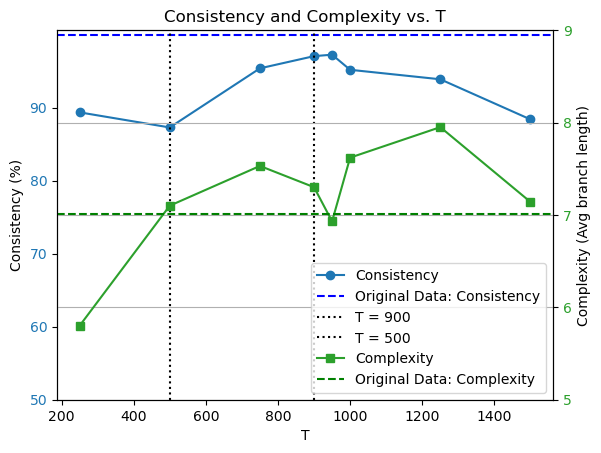

In [558]:


# Plot consistency and complexity
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('T')
ax1.set_ylabel('Consistency (%)', color="black")
ax1.plot(Ts, consistency, color=color, marker='o', linestyle='-', label='Consistency')
ax1.axhline(y=100.00, color='blue', linestyle='--', label='Original Data: Consistency')
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_ticks(np.arange(50, 100, 10))
ax1.axvline(x=900, color='black', linestyle=':', label="T = 900")
ax1.axvline(x=500, color='black', linestyle=':', label="T = 500")

ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Complexity (Avg branch length)', color="black")
ax2.plot(Ts, avg_branch_length, color=color, marker='s', linestyle='-', label='Complexity')
ax2.axhline(y=7.01, color='green', linestyle='--', label='Original Data: Complexity')
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_ticks(np.arange(5, 10))


# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Title
plt.title('Consistency and Complexity vs. T')
plt.savefig("Tresults2")

# Show plot
plt.grid(True)
plt.show()


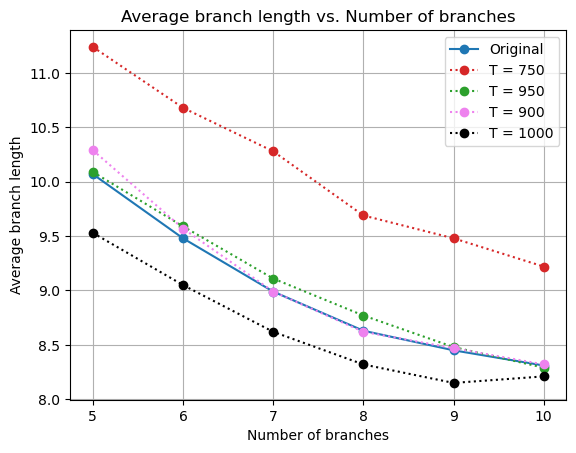

In [557]:
branches = [5, 6, 7, 8, 9, 10]
branch_length = [10.07, 9.48, 8.99, 8.63, 8.45, 8.31]
branch_length_T900 = [10.29, 9.57, 8.99, 8.62, 8.47, 8.32]
branch_length_T950 = [10.09, 9.59, 9.11, 8.77, 8.48, 8.29]
branch_length_T750 = [11.24, 10.68, 10.28, 9.69, 9.48, 9.22]
branch_length_T900 = [10.29, 9.57, 8.99, 8.62, 8.47, 8.32]
branch_length_T500 = [10.52, 9.55, 8.96, 8.60, 8.18, 8.17]
branch_length_T1000 = [9.53, 9.05, 8.62, 8.32, 8.15, 8.21]



# Plot consistency and complexity
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of branches')
ax1.set_ylabel("Average branch length", color="black")
ax1.plot(branches, branch_length, color=color, marker='o', linestyle='-', label='Original')
ax1.tick_params(axis='y', labelcolor="black")


color = 'tab:red'
ax1.plot(branches, branch_length_T750, color=color, marker='o', linestyle=':', label='T = 750')

color = 'tab:green'
ax1.plot(branches, branch_length_T950, color=color, marker='o', linestyle=':', label='T = 950')


color = 'tab:violet'
ax1.plot(branches, branch_length_T900, color="violet", marker='o', linestyle=':', label='T = 900')


color = 'tab:black'
ax1.plot(branches, branch_length_T1000, color="black", marker='o', linestyle=':', label='T = 1000')



# Legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(loc='upper right')

# Title
plt.title('Average branch length vs. Number of branches')
plt.savefig("T_branch_results")

# Show plot
plt.grid(True)
plt.show()

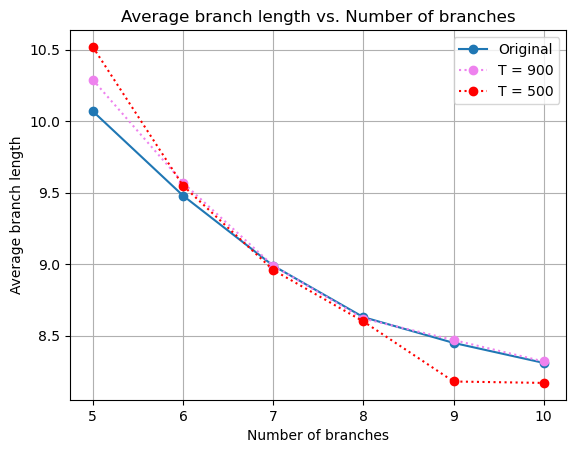

In [598]:
branches = [5, 6, 7, 8, 9, 10]
branch_length = [10.07, 9.48, 8.99, 8.63, 8.45, 8.31]
branch_length_T900 = [10.29, 9.57, 8.99, 8.62, 8.47, 8.32]
branch_length_T500 = [10.52, 9.55, 8.96, 8.60, 8.18, 8.17]




# Plot consistency and complexity
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Number of branches')
ax1.set_ylabel("Average branch length", color="black")
ax1.plot(branches, branch_length, color=color, marker='o', linestyle='-', label='Original')
ax1.tick_params(axis='y', labelcolor="black")



color = 'tab:violet'
ax1.plot(branches, branch_length_T900, color="violet", marker='o', linestyle=':', label='T = 900')



# Legend
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(loc='upper right')

# Title
plt.title('Average branch length vs. Number of branches')
plt.savefig("T_branch_results2")

# Show plot
plt.grid(True)
plt.show()

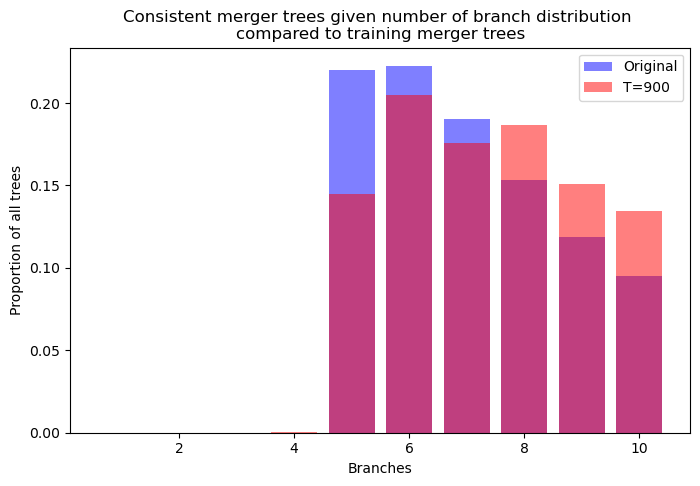

In [560]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Generate data for two distributions
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
num_trees_original = np.array([0, 0, 0, 0, 6075, 6139, 5248, 4234, 3282, 2623])
num_trees_T900 = np.array([0, 0, 0, 2, 422, 597, 513, 545, 440, 393])


num_original = num_trees_original / np.sum(num_trees_original)
num_T900 = num_trees_T900 / np.sum(num_trees_T950)

# Plot both distributions on the same plot
plt.figure(figsize=(8, 5))
plt.bar(num_branches, num_original, alpha=0.5, color='blue', label='Original')
plt.bar(num_branches, num_T900, alpha=0.5, color='red', label='T=900')

# Add labels and legend
plt.xlabel('Branches')
plt.ylabel('Proportion of all trees')
plt.title('Consistent merger trees given number of branch distribution \ncompared to training merger trees')
plt.legend()

# Show plot
plt.show()

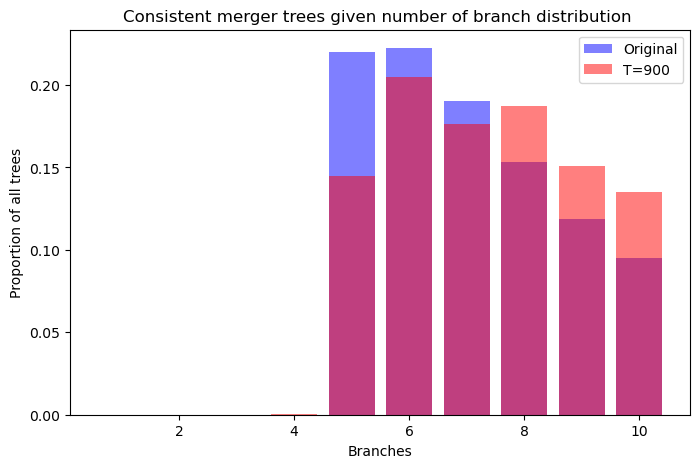

In [493]:


# Generate data for two distributions
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
num_trees_original = np.array([0, 0, 0, 0, 6075, 6139, 5248, 4234, 3282, 2623])
num_trees_T900 = np.array([0, 0 ,0, 2, 422, 597, 513, 545, 440, 393])


num_original = num_trees_original / np.sum(num_trees_original)
num_T900 = num_trees_T900 / np.sum(num_trees_T900)

# Plot both distributions on the same plot
plt.figure(figsize=(8, 5))
plt.bar(num_branches, num_original, alpha=0.5, color='blue', label='Original')
plt.bar(num_branches, num_T900, alpha=0.5, color='red', label='T=900')

# Add labels and legend
plt.xlabel('Branches')
plt.ylabel('Proportion of all trees')
plt.title('Consistent merger trees given number of branch distribution ')
plt.legend()

# Show plot
plt.show()

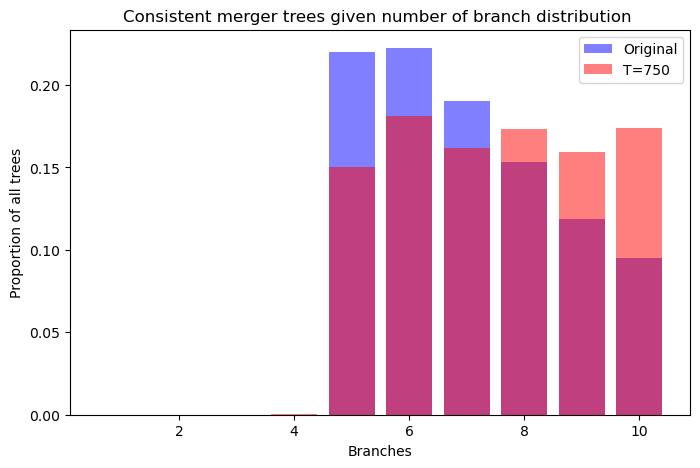

In [302]:


num_trees_original = [0, 0, 0, 0, 6075, 6139, 5248, 4234, 3282, 2623]
num_trees_T750 = [0, 0, 0, 1, 430, 518, 463, 496, 456, 498]

num_original = num_trees_original / np.sum(num_trees_original)
num_T750 = num_trees_T750 / np.sum(num_trees_T750)

# Plot both distributions on the same plot
plt.figure(figsize=(8, 5))
plt.bar(num_branches, num_original, alpha=0.5, color='blue', label='Original')
plt.bar(num_branches, num_T750, alpha=0.5, color='red', label='T=750')

# Add labels and legend
plt.xlabel('Branches')
plt.ylabel('Proportion of all trees')
plt.title('Consistent merger trees given number of branch distribution ')


plt.legend()

# Show plot
plt.show()